<a href="https://colab.research.google.com/github/dianavalverdedelariviera/S-S/blob/main/2_Se%C3%B1ales_est%C3%A1ndar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ejercicio**


* Pruebe otros valores de `omega` y `sigma` para crear señales con amplitud creciente/decreciente/constante y diferentes frecuencias angulares.  

x(t)= exp(t*(1.0*I*omega + sigma))


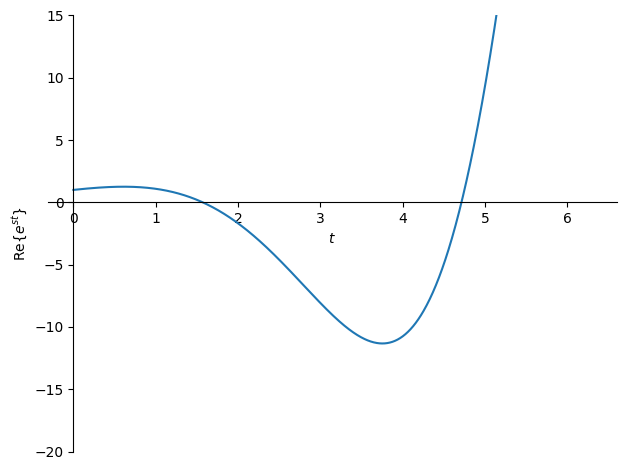

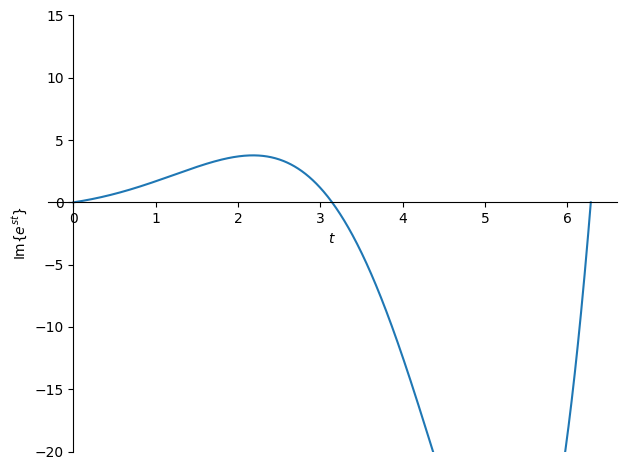

In [ ]:
#ejemplo creciente -> sigma > 0
y = x.subs({omega: 1, sigma : 0.7 })
print(r'x(t)=',x)

sym.plot(sym.re(y), (t, 0, 2*sym.pi), ylabel=r'Re{$e^{st}$}',ylim=[-20,15]) #r' indica al linterprete una variable tipo string
sym.plot(sym.im(y), (t, 0, 2*sym.pi), ylabel=r'Im{$e^{st}$}',ylim=[-20,15]);

### Impulso de Dirac - Función delta $\delta(t)$

El impulso de Dirac es una de las más importantes señales en la teoría de señales y sistemas. Es usada para la caracterización de SLIT y el modelado de señales similares a impulsos.

El impulso de Dirac es definido de la forma [Función delta de Dirac](https://en.wikipedia.org/wiki/Dirac_delta_function) la cual no es una función en el sentido convencional. Es una función generalizada o *distribución*.

El impulso de Dirac es denotado como $\delta(t)$. La función delta de Dirac se define por su efecto en otras funciones. Afortunadamente para su aplicación en el procesamiento de señales, es adecuado considerar solo ciertas propiedades. Las más relevantes son:

- **Propiedad de selectividad**

    \begin{equation}
    \int_{-\infty}^{\infty} \delta(t) \cdot x(t) = x(0)
    \end{equation}
    
donde $x(t)$ necesita ser diferenciable en $t=0$. La propiedad de selectividad implica $\int_{-\infty}^{\infty} \delta(t) = 1$.

- **Multiplicación**

    \begin{equation}
    x(t) \cdot \delta(t) = x(0) \cdot \delta(t)
    \end{equation}
    
donde $x(t)$ necesita ser diferenciable en $t=0$.
    
-  **Linealidad**
    \begin{equation}
    a \cdot \delta(t) + b \cdot \delta(t) = (a+b) \cdot \delta(t)
    \end{equation}
    
- **Escamalmiento**
    \begin{equation}
    \delta(a t) = \frac{1}{|a|} \delta(t)
    \end{equation}

donde $a \in \mathbb{R} \setminus 0$ (sin incluir el 0). Esto implica que el impulso de Dirac es una función con simetría uniforme.
    
- **Derivación**
    \begin{equation}
    \int_{-\infty}^{\infty} \frac{d \delta(t)}{dt} \cdot x(t) \; dt = - \frac{d x(t)}{dt} \bigg\vert_{t = 0}
    \end{equation}

Es importante notar que el producto $\delta(t) \cdot \delta(t)$ de dos impulsos de Dirac no está definido.

**Ejemplo**

Este ejemplo ilustra alguanas propiedades básicas del impulso de Dirac. Primero definamos un impulso de Dirac:

In [ ]:
delta = sym.DiracDelta(t)#función dirac en sympy
delta

Ahora probemos la propiedad de selectividad definiendo una señal arbitraria (función) $f(t)$ e integrando su producto con el impulso Delta

In [ ]:
f = sym.Function('f')(t) # f(t)
sym.integrate(delta*f, (t, -sym.oo, sym.oo)) # integral con limites desde -inf hasta +inf


In [ ]:
f

**Ejercicio**

* Compruebe la propiedad de selectividad, para un impulso de Dirac desplazado $\delta(t-\tau)$ y probar los resultados modificando el ejemplo anterior.

In [ ]:
#f(t-\tau)
#definir tau
tau = sym.symbols('tau', real=True)
g = sym.Function('g')(t) # g(t)
delta_T = sym.DiracDelta(t-tau) # delta(t-tau)
delta_T
sym.integrate(delta_T*g, (t, -sym.oo, sym.oo))


### Señal Heaviside - Función escalón

La función escalón o [Heaviside](https://en.wikipedia.org/wiki/Heaviside_step_function) se define como:

\begin{equation}
\epsilon(t) = \begin{cases} 0 & t<0 \\  \frac{1}{2} & t=0 \\ 1 & t > 0 \end{cases}
\end{equation}

Algunas definiciones alternativas existen con respecto al valor de $\epsilon(t)$ en $t=0$. La función Heaviside se usa para representar un cambio en un punto específico del tiempo y se mantiene encendido de forma indefinida.

El escalón y el delta se relacionan mediante la siguiente expresión:

\begin{equation}
\int_{-\infty}^{t} \delta(\tau) \; d\tau = \epsilon(t)
\end{equation}

**Ejemplo**

A continuación, una señal Heaviside $\epsilon(t)$ se define y grafica. Note que `Sympy` denota la función Heaviside como $\theta(t)$.

In [ ]:
step = sym.Heaviside(t)#función escalón en sympy
step

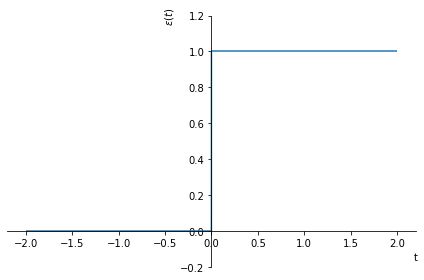

In [ ]:
sym.plot(step, (t, -2, 2), ylim=[-0.2, 1.2], ylabel=r'$\epsilon(t)$');

Ahora se construye un armónico (señal coseno o seno) $\cos(\omega t)$ con $\omega=2$, el cual se enciende en $t=0$:

\begin{equation}
x(t) = \cos(\omega t) \cdot \epsilon(t)
\end{equation}

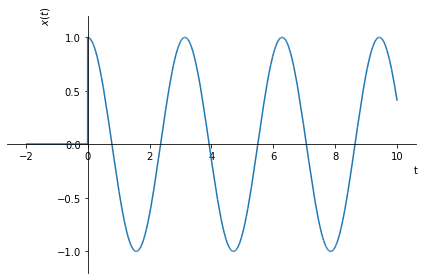

In [ ]:
x = sym.cos(omega*t) * sym.Heaviside(t)
sym.plot(x.subs(omega,2), (t, -2, 10), ylim=[-1.2, 1.2], ylabel=r'$x(t)$');


### Señal pulso rectangular

La función [pulso rectangular](https://en.wikipedia.org/wiki/Rectangular_function) se define como:

\begin{equation}
\text{rect}(t) = \begin{cases} 1 & |t| < \frac{1}{2} \\ \frac{1}{2} & |t| = \frac{1}{2} \\ 1 & |t| > \frac{1}{2} \end{cases}
\end{equation}

Algunas definiciones alternativas existen difiriendo del valor de $\text{rect}(t)$ para $t = \pm \frac{1}{2}$. La señal pulso rectangular se utiliza para representar un encendido por un intervalo limitado de tiempo o de duración finita, y se relaciona con la función Heaviside asi:

\begin{equation}
\text{rect}(t) = \epsilon \left(t + \frac{1}{2} \right) - \epsilon \left(t - \frac{1}{2} \right)
\end{equation}

**Ejemplo**

A continuación se define la función pulso rectangular desde el escalón en `Sympy`:

In [ ]:
class rect(sym.Function): #clase/objeto tipo sympy

    @classmethod #decorador objeto
    def eval(cls, arg):
        return sym.Heaviside(arg + sym.S.Half) - sym.Heaviside(arg - sym.S.Half)

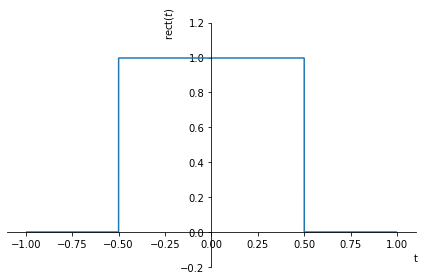

In [ ]:
sym.plot(rect(t), (t, -1, 1), ylim=[-0.2, 1.2], ylabel=r'rect$(t)$');

**Ejercicio**

* Use la función $\text{rect}(t)$ para construir una función $\cos(\omega t)$ con $\omega=2$, la cual se enciende en $t=-\frac{1}{2}$ y se apaga en $t=+\frac{1}{2}$.

### Función signo

La función [signo/signum function](https://en.wikipedia.org/wiki/Sign_function) evalua el signo de su argumento:

\begin{equation}
\text{sgn}(t) = \begin{cases} 1 & t>0 \\ 0 & t=0 \\ -1 & t < 0  \end{cases}
\end{equation}

La señal sign es útil para representar el valor absoluto de una señal real $x(t) \in \mathbb{R}$ como:

\begin{equation}
|x(t)| = x(t) \cdot \text{sgn}(x(t))
\end{equation}

y se relaciona con la señal Heaviside como:

\begin{equation}
\text{sgn}(t) = 2 \cdot \epsilon(t) - 1
\end{equation}

**Ejemplo**

El siguiente ejemplo ilustra la función $\text{sgn}(t)$. Note que la función sign se representa como $\text{sign}(t)$ en `Sympy`.

In [ ]:
sgn = sym.sign(t)
sgn

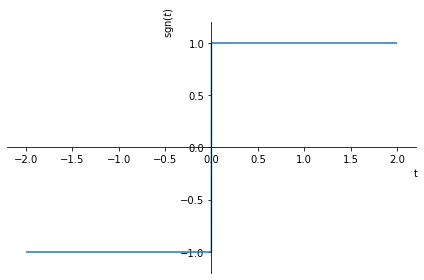

In [ ]:
sym.plot(sgn, (t, -2, 2), ylim=[-1.2, 1.2], ylabel=r'sgn$(t)$');

**Ejercicio**

Genere un [rectificador de onda completa](https://en.wikipedia.org/wiki/Rectifier#Full-wave_rectification) utilizando la función $\text{sgn}(t)$

**Copyright**

The notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebook for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Signals and Systems* by Sascha Spors.